In [254]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [255]:
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [256]:
df=pd.read_csv('properties.csv')
df.head()

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income
0,34221000,225000.0,APARTMENT,APARTMENT,Flanders,Antwerp,Antwerp,2050,51.217172,4.379982,...,0,0.0,0,0,MISSING,231.0,C,GAS,1,922.0
1,2104000,449000.0,HOUSE,HOUSE,Flanders,East Flanders,Gent,9185,51.174944,3.845248,...,0,0.0,0,0,MISSING,221.0,C,MISSING,1,406.0
2,34036000,335000.0,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1070,50.842043,4.334543,...,0,0.0,0,1,AS_NEW,NaN,MISSING,GAS,0,NaN
3,58496000,501000.0,HOUSE,HOUSE,Flanders,Antwerp,Turnhout,2275,51.238312,4.817192,...,0,0.0,0,1,MISSING,99.0,A,MISSING,0,NaN
4,48727000,982700.0,APARTMENT,DUPLEX,Wallonia,Walloon Brabant,Nivelles,1410,NaN,NaN,...,1,142.0,0,0,AS_NEW,19.0,A+,GAS,0,NaN


In [257]:
def calculate_missing_percentage(df):
    # Calculate the total number of missing values in each column
    missing_values = df.isnull().sum().sort_values()

    # Calculate the total number of rows in the DataFrame
    total_rows = df.shape[0]

    # Calculate the percentage of missing values in each column
    percentage_missing_values = (missing_values / total_rows) * 100

    # Display the percentage of missing values in each column
    print("Percentage of missing values in each column:")
    print(percentage_missing_values)

# Call the function with your DataFrame as an argument
calculate_missing_percentage(df)


Percentage of missing values in each column:
id                                 0.000000
heating_type                       0.000000
epc                                0.000000
state_building                     0.000000
fl_floodzone                       0.000000
fl_swimming_pool                   0.000000
fl_garden                          0.000000
fl_terrace                         0.000000
fl_open_fire                       0.000000
fl_furnished                       0.000000
equipped_kitchen                   0.000000
fl_double_glazing                  0.000000
nbr_bedrooms                       0.000000
price                              0.000000
zip_code                           0.000000
locality                           0.000000
property_type                      0.000000
province                           0.000000
region                             0.000000
subproperty_type                   0.000000
garden_sqm                         3.892148
total_area_sqm                 

In [258]:
df_mod=df.drop(columns=['fl_floodzone','fl_swimming_pool','fl_garden','fl_terrace','fl_open_fire','fl_furnished','fl_double_glazing','locality'])

In [259]:
# Filtering by house
df_houses = df_mod[df_mod['subproperty_type'] == 'HOUSE']
df_houses.head()

,id,price,property_type,subproperty_type,region,province,zip_code,latitude,longitude,construction_year,...,nbr_frontages,nbr_bedrooms,equipped_kitchen,terrace_sqm,garden_sqm,state_building,primary_energy_consumption_sqm,epc,heating_type,cadastral_income
1,2104000,449000.0,HOUSE,HOUSE,Flanders,East Flanders,9185,51.174944,3.845248,NaN,...,NaN,2.0,MISSING,0.0,0.0,MISSING,221.0,C,MISSING,406.0
3,58496000,501000.0,HOUSE,HOUSE,Flanders,Antwerp,2275,51.238312,4.817192,2024.0,...,NaN,3.0,MISSING,0.0,0.0,MISSING,99.0,A,MISSING,NaN
5,22183000,548514.0,HOUSE,HOUSE,Flanders,Flemish Brabant,1700,NaN,NaN,NaN,...,4.0,3.0,MISSING,0.0,0.0,AS_NEW,NaN,MISSING,MISSING,NaN
7,48707000,424000.0,HOUSE,HOUSE,Flanders,East Flanders,9800,50.983015,3.570742,2023.0,...,NaN,4.0,HYPER_EQUIPPED,0.0,0.0,GOOD,NaN,MISSING,MISSING,NaN
10,28322000,385000.0,HOUSE,HOUSE,Flanders,East Flanders,9190,51.206244,4.075700,NaN,...,3.0,3.0,MISSING,0.0,0.0,MISSING,NaN,MISSING,MISSING,NaN


In [260]:
# Filtering by house
df_apartment = df_mod[df_mod['subproperty_type'] == 'APARTMENT']
df_apartment.head()

,id,price,property_type,subproperty_type,region,province,zip_code,latitude,longitude,construction_year,...,nbr_frontages,nbr_bedrooms,equipped_kitchen,terrace_sqm,garden_sqm,state_building,primary_energy_consumption_sqm,epc,heating_type,cadastral_income
0,34221000,225000.0,APARTMENT,APARTMENT,Flanders,Antwerp,2050,51.217172,4.379982,1963.0,...,2.0,2.0,INSTALLED,5.0,0.0,MISSING,231.0,C,GAS,922.0
2,34036000,335000.0,APARTMENT,APARTMENT,Brussels-Capital,Brussels,1070,50.842043,4.334543,NaN,...,2.0,3.0,INSTALLED,NaN,0.0,AS_NEW,NaN,MISSING,GAS,NaN
6,13232000,325000.0,APARTMENT,APARTMENT,Wallonia,Walloon Brabant,1420,50.683607,4.371513,NaN,...,NaN,1.0,MISSING,11.0,0.0,MISSING,NaN,MISSING,GAS,NaN
8,74290000,185000.0,APARTMENT,APARTMENT,Wallonia,Liège,4000,50.631825,5.557352,NaN,...,2.0,2.0,MISSING,NaN,0.0,MISSING,212.0,C,MISSING,NaN
11,52406000,957000.0,APARTMENT,APARTMENT,Flanders,West Flanders,8670,51.133551,2.684137,NaN,...,NaN,3.0,NOT_INSTALLED,24.0,0.0,MISSING,NaN,MISSING,MISSING,NaN


In [261]:
import numpy as np

# Define lists to store numerical and categorical column names
numerical_cols = []
categorical_cols = []

# Loop through DataFrame columns
for column in df_houses.columns:
    # Check if the column is numerical
    if df_houses[column].dtype in [np.int64, np.float64]:
        numerical_cols.append(column)
    else:
        categorical_cols.append(column)

# Print the lists of numerical and categorical columns
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)


Numerical columns: ['id', 'price', 'zip_code', 'latitude', 'longitude', 'construction_year', 'total_area_sqm', 'surface_land_sqm', 'nbr_frontages', 'nbr_bedrooms', 'terrace_sqm', 'garden_sqm', 'primary_energy_consumption_sqm', 'cadastral_income']
Categorical columns: ['property_type', 'subproperty_type', 'region', 'province', 'equipped_kitchen', 'state_building', 'epc', 'heating_type']


In [262]:
from sklearn.model_selection import KFold
X = df_houses.drop(columns=['price'])
y = df_houses[['price']]  # Target variable
# Define the number of splits for Stratified K-Fold Cross-Validation
n_splits = 5

# Initialize the KFold object
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=0)

# Iterate over the splits and obtain the training and testing indices
for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Printing the shapes of the training and testing sets for each fold
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (23784, 21)
Shape of X_test: (5946, 21)
Shape of y_train: (23784, 1)
Shape of y_test: (5946, 1)


In [263]:
X_train.head()

,id,property_type,subproperty_type,region,province,zip_code,latitude,longitude,construction_year,total_area_sqm,...,nbr_frontages,nbr_bedrooms,equipped_kitchen,terrace_sqm,garden_sqm,state_building,primary_energy_consumption_sqm,epc,heating_type,cadastral_income
1,2104000,HOUSE,HOUSE,Flanders,East Flanders,9185,51.174944,3.845248,NaN,NaN,...,NaN,2.0,MISSING,0.0,0.0,MISSING,221.0,C,MISSING,406.0
3,58496000,HOUSE,HOUSE,Flanders,Antwerp,2275,51.238312,4.817192,2024.0,187.0,...,NaN,3.0,MISSING,0.0,0.0,MISSING,99.0,A,MISSING,NaN
5,22183000,HOUSE,HOUSE,Flanders,Flemish Brabant,1700,NaN,NaN,NaN,187.0,...,4.0,3.0,MISSING,0.0,0.0,AS_NEW,NaN,MISSING,MISSING,NaN
7,48707000,HOUSE,HOUSE,Flanders,East Flanders,9800,50.983015,3.570742,2023.0,155.0,...,NaN,4.0,HYPER_EQUIPPED,0.0,0.0,GOOD,NaN,MISSING,MISSING,NaN
10,28322000,HOUSE,HOUSE,Flanders,East Flanders,9190,51.206244,4.075700,NaN,309.0,...,3.0,3.0,MISSING,0.0,0.0,MISSING,NaN,MISSING,MISSING,NaN


# Preprocessing Steps

In [264]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
import pandas as pd

# Define categorical columns
categorical_columns = ['region', 'province', 'equipped_kitchen', 'heating_type','state_building', 'epc']
#ordinal_columns = ['state_building', 'epc']
numerical_columns = ['zip_code', 'latitude', 'longitude', 'construction_year', 
                     'total_area_sqm', 'surface_land_sqm', 'nbr_frontages', 
                     'nbr_bedrooms', 'terrace_sqm', 'garden_sqm', 
                     'primary_energy_consumption_sqm', 'cadastral_income']  

# Imputation
imputer = KNNImputer(n_neighbors=5)

X_train_imputed = X_train[numerical_columns].copy()
X_test_imputed = X_test[numerical_columns].copy()

X_train_imputed[numerical_columns] = imputer.fit_transform(X_train[numerical_columns])
X_test_imputed[numerical_columns] = imputer.transform(X_test[numerical_columns])

print(X_train_imputed)


               id  zip_code   latitude  longitude  construction_year  \
1       2104000.0    9185.0  51.174944   3.845248             1963.8   
3      58496000.0    2275.0  51.238312   4.817192             2024.0   
5      22183000.0    1700.0  50.744420   4.894272             1955.8   
7      48707000.0    9800.0  50.983015   3.570742             2023.0   
10     28322000.0    9190.0  51.206244   4.075700             1991.8   
...           ...       ...        ...        ...                ...   
75489  36688000.0    4280.0  50.696639   5.129448             1900.0   
75492  28581000.0    9600.0  50.608195   4.198608             1981.0   
75497  13464000.0    8660.0  51.073110   2.601931             1982.4   
75499  26373000.0    1070.0  50.842838   4.306209             1960.6   
75503  39588000.0    2300.0  51.321260   4.947304             1987.6   

       total_area_sqm  surface_land_sqm  nbr_frontages  nbr_bedrooms  \
1               155.8             680.0            2.6         

In [265]:
# Scaling
scaler = StandardScaler()

X_train_scaled = X_train_imputed.copy()
X_test_scaled = X_test_imputed.copy()

X_train_scaled[numerical_columns] = scaler.fit_transform(X_train_imputed[numerical_columns])
X_test_scaled[numerical_columns] = scaler.transform(X_test_imputed[numerical_columns])
print(X_train_scaled)


             id  zip_code  latitude  longitude  construction_year  \
1     -1.645790  1.245038  0.965229  -0.614884          -0.189164   
3      0.813298 -1.162174  1.147979   0.444554           1.524517   
5     -0.770204 -1.362485 -0.276363   0.528573          -0.416895   
7      0.386429  1.459283  0.411723  -0.914101           1.496051   
10    -0.502500  1.246779  1.055496  -0.363687           0.607897   
...         ...       ...       ...        ...                ...   
75489 -0.137684 -0.463700 -0.414158   0.784919          -2.005324   
75492 -0.491206  1.389610 -0.669225  -0.229715           0.300460   
75497 -1.150414  1.062145  0.671551  -1.970124           0.340313   
75499 -0.587491 -1.581956  0.007467  -0.112427          -0.280256   
75503 -0.011224 -1.153465  1.387192   0.586379           0.488338   

       total_area_sqm  surface_land_sqm  nbr_frontages  nbr_bedrooms  \
1           -0.176346         -0.020066      -0.367518     -0.978713   
3           -0.008517      

In [266]:


# Define categorical columns
categorical_columns = ['region', 'province', 'equipped_kitchen', 'heating_type','state_building', 'epc']

# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(drop='first')

# Fit and transform the training data
X_train_encoded = one_hot_encoder.fit_transform(X_train[categorical_columns])

# Transform the test data
X_test_encoded = one_hot_encoder.transform(X_test[categorical_columns])

# Convert encoded arrays to DataFrames
encoded_columns = one_hot_encoder.get_feature_names_out(input_features=categorical_columns)
X_train_encoded_df = pd.DataFrame(X_train_encoded.toarray(), columns=encoded_columns)
X_test_encoded_df = pd.DataFrame(X_test_encoded.toarray(), columns=encoded_columns)

# Print the encoded DataFrames
print("Encoded DataFrame after OneHotEncoding (training data):")
print(X_train_encoded_df)



Encoded DataFrame after OneHotEncoding (training data):
       region_Flanders  region_Wallonia  province_Brussels  \
0                  1.0              0.0                0.0   
1                  1.0              0.0                0.0   
2                  1.0              0.0                0.0   
3                  1.0              0.0                0.0   
4                  1.0              0.0                0.0   
...                ...              ...                ...   
23779              0.0              1.0                0.0   
23780              1.0              0.0                0.0   
23781              1.0              0.0                0.0   
23782              0.0              0.0                1.0   
23783              1.0              0.0                0.0   

       province_East Flanders  province_Flemish Brabant  province_Hainaut  \
0                         1.0                       0.0               0.0   
1                         0.0                

In [267]:
# Concatenate all the encoded and scaled columns
X_train_concatenated = pd.DataFrame(
    data=np.concatenate([X_train_scaled, X_train_encoded_df], axis=1),
    columns=numerical_columns + list(one_hot_encoder.get_feature_names_out(input_features=categorical_columns)) 
)
X_test_concatenated = pd.DataFrame(
    data=np.concatenate([X_test_scaled, X_test_encoded_df], axis=1),
    columns=numerical_columns + list(one_hot_encoder.get_feature_names_out(input_features=categorical_columns)) 
)

# Print the concatenated DataFrames
print("Concatenated DataFrame after preprocessing (training data):")
print(X_train_concatenated)


Concatenated DataFrame after preprocessing (training data):
             id  zip_code  latitude  longitude  construction_year  \
0     -1.645790  1.245038  0.965229  -0.614884          -0.189164   
1      0.813298 -1.162174  1.147979   0.444554           1.524517   
2     -0.770204 -1.362485 -0.276363   0.528573          -0.416895   
3      0.386429  1.459283  0.411723  -0.914101           1.496051   
4     -0.502500  1.246779  1.055496  -0.363687           0.607897   
...         ...       ...       ...        ...                ...   
23779 -0.137684 -0.463700 -0.414158   0.784919          -2.005324   
23780 -0.491206  1.389610 -0.669225  -0.229715           0.300460   
23781 -1.150414  1.062145  0.671551  -1.970124           0.340313   
23782 -0.587491 -1.581956  0.007467  -0.112427          -0.280256   
23783 -0.011224 -1.153465  1.387192   0.586379           0.488338   

       total_area_sqm  surface_land_sqm  nbr_frontages  nbr_bedrooms  \
0           -0.176346         -0.020066

In [268]:
from sklearn.preprocessing import StandardScaler

def scale_columns(y_train,y_test, columns_to_scale):
    
    # Create a StandardScaler object
    scaler = StandardScaler()

    # Fit the scaler to the columns in X_train and transform them
    y_train_scaled = scaler.fit_transform(y_train[columns_to_scale])

    # Transform the columns in X_test using the same scaler
    y_test_scaled = scaler.transform(y_test[columns_to_scale])

    return y_train_scaled, y_test_scaled
columns_to_scale = ['price']

# Scale columns in X_train and X_test
y_train_scaled, y_test_scaled = scale_columns(y_train, y_test, columns_to_scale)

In [269]:
y_train_scaled, y_test_scaled = scale_columns(y_train, y_test, columns_to_scale)
print(y_train_scaled)

[[ 0.18897618]
 [ 0.34898234]
 [ 0.49518489]
 ...
 [-0.0387249 ]
 [-0.19257698]
 [-0.42643214]]


In [270]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create a regressor object
regressor = LinearRegression()

# Train the model with X_train and y_train
regressor.fit(X_train_concatenated, y_train_scaled)

# Display the score of the model with X_train and y_train
train_score = regressor.score(X_train_concatenated, y_train_scaled)
print("Training Score (R-squared):", train_score)

# Use the predict method of the model on the test dataset (X_test)
y_pred = regressor.predict(X_test_concatenated)

# Display the score of the model with X_test and y_test
test_score = regressor.score(X_test_concatenated, y_test_scaled)
print("Testing Score (R-squared):", test_score)

Training Score (R-squared): 0.3712395192057816
Testing Score (R-squared): 0.37213386584577024


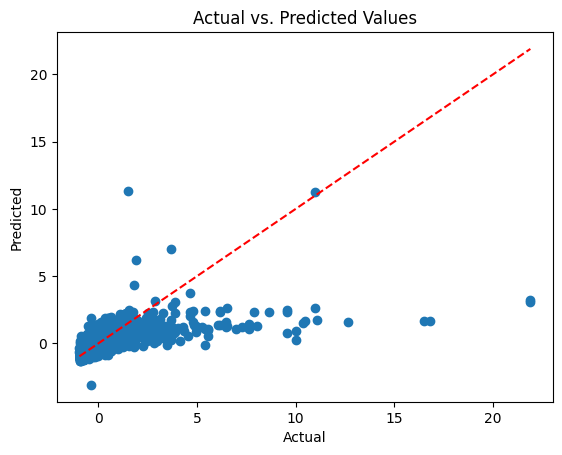

In [271]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of actual vs. predicted values
plt.scatter(y_test_scaled, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted Values")

# Plot the regression line
plt.plot([min(y_test_scaled), max(y_test_scaled)], [min(y_test_scaled), max(y_test_scaled)], linestyle='--', color='red')

plt.show()

In [272]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Create a RandomForestRegressor object
forest_regressor = RandomForestRegressor(random_state=0)

# Train the model with X_train_concatenated and y_train_scaled
forest_regressor.fit(X_train_concatenated, y_train_scaled)

# Display the score of the model with X_train_concatenated and y_train_scaled
train_score = forest_regressor.score(X_train_concatenated, y_train_scaled)
print("Training Score (R-squared):", train_score)

# Use the predict method of the model on the test dataset (X_test_concatenated)
y_pred = forest_regressor.predict(X_test_concatenated)

# Display the score of the model with X_test_concatenated and y_test_scaled
test_score = forest_regressor.score(X_test_concatenated, y_test_scaled)
print("Testing Score (R-squared):", test_score)

c:\Users\becod\GNT-Arai-6\immo-liza-ml\myenv\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training Score (R-squared): 0.952276228616059
Testing Score (R-squared): 0.6762643155458533


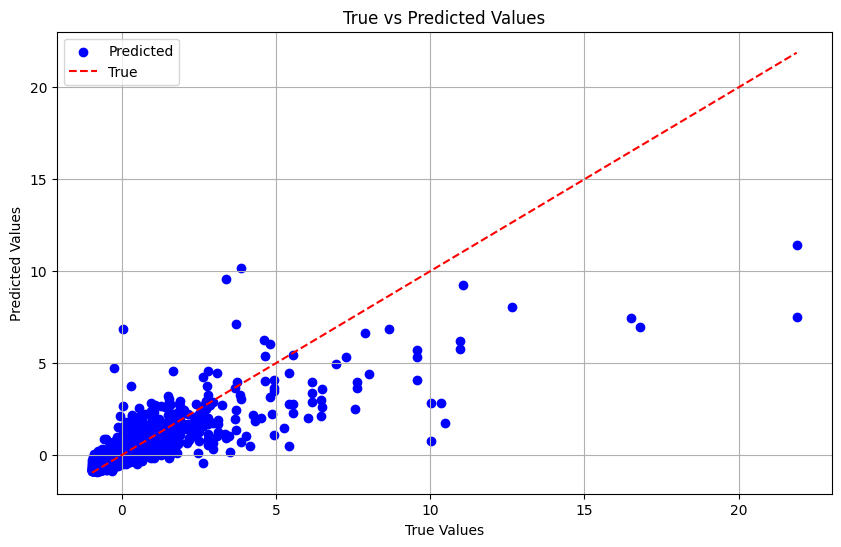

In [274]:
import matplotlib.pyplot as plt

# Plotting the true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_scaled, y_pred, color='blue', label='Predicted')
plt.plot([y_test_scaled.min(), y_test_scaled.max()], [y_test_scaled.min(), y_test_scaled.max()], color='red', linestyle='--', label='True')
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [273]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import StackingRegressor

# Define base models
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('linear_regression', LinearRegression()),
    ('xgboost', XGBRegressor(n_estimators=100, random_state=42)),
    ('catboost', CatBoostRegressor(iterations=100, random_state=42, verbose=False))
]

# Initialize stacking regressor with meta-model
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Train stacking regressor
stacking_regressor.fit(X_train_concatenated, y_train_scaled)

# Evaluate on training set
train_score = stacking_regressor.score(X_train_concatenated, y_train_scaled)
print("Training Score (R-squared):", train_score)

# Evaluate on test set
test_score = stacking_regressor.score(X_test_concatenated, y_test_scaled)
print("Testing Score (R-squared):", test_score)


<frozen importlib._bootstrap>:488: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject
c:\Users\becod\GNT-Arai-6\immo-liza-ml\myenv\Lib\site-packages\sklearn\ensemble\_stacking.py:967: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score (R-squared): 0.935587728709182
Testing Score (R-squared): 0.713598374418857


In [275]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict on the test set
y_pred = stacking_regressor.predict(X_test_concatenated)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test_scaled, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test_scaled, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Absolute Error (MAE): 0.2317823649123009
Mean Squared Error (MSE): 0.297168399868583


In [278]:
# save the predictions in a pickle file
import pickle

# Assuming 'predictions' is the variable containing the predictions
# Get predictions on the training set
train_predictions = stacking_regressor.predict(X_train_concatenated)

# Get predictions on the test set
test_predictions = stacking_regressor.predict(X_test_concatenated)

# Specify the file path where you want to save the pickle file
pickle_file_path = 'predictions.pkl'

# Open a file in binary write mode
with open(pickle_file_path, 'wb') as f:
    # Dump the predictions into the file
    pickle.dump(train_predictions, f)
    pickle.dump(test_predictions, f)

print("Predictions saved to", pickle_file_path)

# Specify the file path from where you want to load the pickle file
pickle_file_path = 'predictions.pkl'

# Open the file in binary read mode
with open(pickle_file_path, 'rb') as f:
    # Load the predictions from the file
    loaded_predictions = pickle.load(f)

# Now 'loaded_predictions' contains the predictions loaded from the pickle file

pickle_file_path = 'predictions.pkl'

# Open the file in binary read mode
with open(pickle_file_path, 'rb') as f:
    # Load the predictions from the file
    loaded_predictions = pickle.load(f)


Predictions saved to predictions.pkl
